In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [91]:
data = pd.read_csv('/content/drive/MyDrive/Apple.csv')

# Checking the number of rows(observations) and colmumns(variables)
data.shape


(250, 7)

In [94]:
# Convert 'Close' column to strings and then remove commas
prices = data['Close'].astype(str).str.replace(',', '').astype(float).values


In [95]:
scaler = MinMaxScaler()
prices = scaler.fit_transform(prices.reshape(-1, 1))

In [96]:
train_size = int(len(prices) * 0.7)
train_data, test_data = prices[:train_size], prices[train_size:]

In [97]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [98]:
seq_length = 10X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [99]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [139]:
model.fit(X_train, y_train, epochs=500, batch_size=64)

Epoch 1/500
3/3 [==============================] - 0s 22ms/step - loss: 0.0017
Epoch 2/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0017
Epoch 3/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0017
Epoch 4/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0017
Epoch 5/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0017
Epoch 6/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0018
Epoch 7/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0017
Epoch 8/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0017
Epoch 9/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0018
Epoch 10/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0017
Epoch 11/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0018
Epoch 12/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0017
Epoch 13/500
3/3 [==============================]

In [140]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

3/3 [==============================] - 0s 5ms/step
Root Mean Squared Error: 0.15010577563200375


In [141]:
import numpy as np  # Import NumPy

future_data = np.array([12.40, 22.04, 32.0, 24.20, 45.0, 46.0, 72.0, 28.0, 29.0, 15.0])
future_data = future_data.reshape(-1, 1)

future_data = scaler.transform(future_data)
future_sequence = future_data[-seq_length:]
future_sequence = future_data.reshape(1, 10, 1)
# future_sequence = future_sequence.reshape(1, seq_length, 1)
future_price = model.predict(future_sequence)
future_price = scaler.inverse_transform(future_price)[0][0]




1/1 [==============================] - 0s 36ms/step


In [142]:
print("Predicted Future Price:", future_price)

Predicted Future Price: 1261.2084


In [143]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

3/3 [==============================] - 0s 4ms/step
Root Mean Squared Error (RMSE): 0.15010577563200375
Mean Absolute Error (MAE): 0.12619182111132998


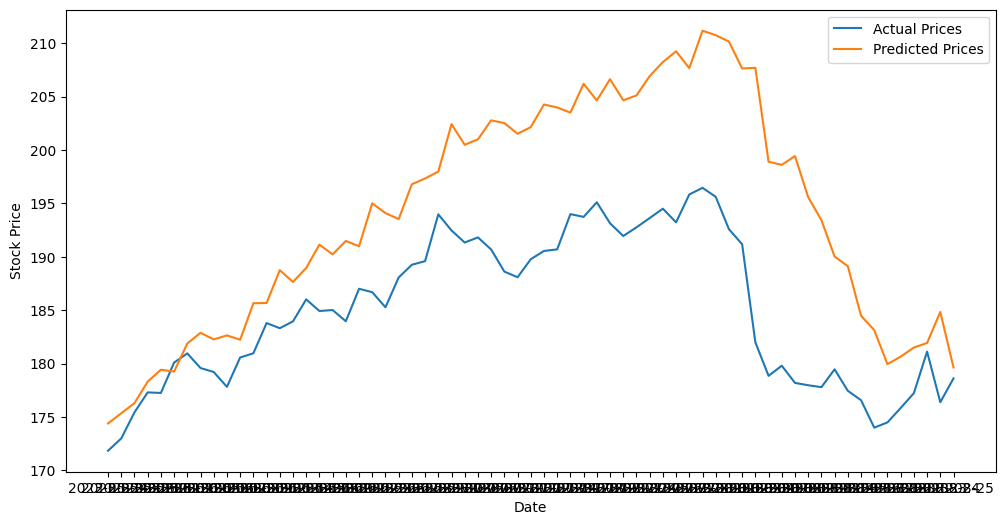

In [144]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][-len(y_test):], scaler.inverse_transform(y_test), label='Actual Prices')
plt.plot(data['Date'][-len(y_test):], scaler.inverse_transform(y_pred), label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
# This code provides a high-level template for stock price prediction using LSTM. However, it's important to fine-tune hyperparameters, handle real-world data complexities, and consider additional factors for more accurate predictions. Additionally, obtaining future data is crucial for making predictions beyond the available historical data.





